# Computación Clásica en una Computadora Cuántica

## Contenido

1. [Introducción](#intro)
2. [Consultar un Oráculo](#oracle)
3. [Sacando la Basura](#garbage)

## 1. Introducción <a id="intro"></a>

Una consecuencia de tener un conjunto universal de compuertas cuánticas es la capacidad de reproducir cualquier cálculo clásico. Solo tenemos que compilar el cálculo clásico en las compuertas lógicas Booleanas que vimos en *Los Átomos de la Computación* y luego reproducirlas en una computadora cuántica.

Esto demuestra un hecho importante sobre las computadoras cuánticas: pueden hacer cualquier cosa que una computadora clásica puede hacer, y pueden hacerlo con al menos la misma complejidad computacional. Aunque no es el objetivo usar computadoras cuánticas para tareas en las que las computadoras clásicas ya sobresalen, esta es una buena demostración de que las computadoras cuánticas pueden resolver una variedad general de problemas.

Además, los problemas que requieren soluciones cuánticas a menudo involucran componentes que pueden abordarse utilizando algoritmos clásicos. En algunos casos, estas partes clásicas se pueden hacer en hardware clásico. Sin embargo, en muchos casos, el algoritmo clásico debe ejecutarse en entradas que existen en un estado de superposición. Esto requiere que el algoritmo clásico se ejecute en hardware cuántico. En esta sección presentamos algunas de las ideas usadas al hacer esto.


## 2. Consultar un Oráculo <a id="oracle"></a>

Muchos algoritmos cuánticos se basan en el análisis de alguna función $f(x)$. A menudo, estos algoritmos simplemente asumen la existencia de alguna implementación de 'caja negra' de esta función, a la que podemos dar una entrada $x$ y recibir la salida correspondiente $f(x)$. Esto se conoce como un *oráculo*.

La ventaja de pensar en el oráculo de esta manera abstracta nos permite concentrarnos en las técnicas cuánticas que usamos para analizar la función, en lugar de la función misma.

Para comprender cómo funciona un oráculo dentro de un algoritmo cuántico, debemos ser específicos acerca de cómo se definen. Una de las principales formas que adoptan los oráculos es la de los *oráculos Booleanos*. Estos se describen mediante la siguiente evolución unitaria,

$$ U_f \left|x , \bar 0 \right\rangle = \left|x, f(x)\right\rangle. $$

Aquí $\left|x , \bar 0 \right\rangle = \left|x \right\rangle \otimes \left|\bar 0 \right\rangle$ se usa para representar un estado de múltiples qubits que consta de dos registros. El primer registro está en el estado $\left|x\right\rangle$, donde $x$ es una representación binaria de la entrada de nuestra función. El número de qubits en este registro es el número de bits necesarios para representar las entradas.

El trabajo del segundo registro es codificar de manera similar la salida. Específicamente, el estado de este registro después de aplicar $U_f$ será una representación binaria de la salida $\left|f(x)\right\rangle$, y este registro constará de tantos qubits como se requieran para esto. Este estado inicial $\left|\bar 0 \right\rangle$ para este registro representa el estado para el cual todos los qubits son $\left|0 \right\rangle$. Para otros estados iniciales, la aplicación de $U_f$ conducirá a resultados diferentes. Los resultados concretos que surjan dependerán de cómo definamos la $U_f$ unitaria.

Otra forma de oráculo es el *oráculo de fase*, que se define de la siguiente manera:

$$ P_f \left|x \right\rangle = (-1)^{f(x)} \left|x \right\rangle, $$

donde la salida $f(x)$ suele ser un valor de bit simple de $0$ o $1$.

Aunque su forma parece muy diferente del oráculo Booleano, es en gran medida otra expresión de la misma idea básica. De hecho, se puede realizar usando el mismo mecanismo de 'retroceso de fase' que se describe en una sección anterior.

Para ver esto, considera el oráculo Booleano $U_f$ que correspondería a la misma función. Esto se puede implementar como algo que es esencialmente una forma generalizada del NOT controlado. Se controla en el registro de entrada, de modo que deja el bit de salida en el estado $\left|0 \right\rangle$ para $f(x)=0$, y aplica $X$ para cambiarlo a $\left |1 \right\rangle$ si $f(x)=1$. Si el estado inicial del registro de salida fuera $\left|- \right\rangle$ en lugar de $\left|0 \right\rangle$, el efecto de $U_f$ sería inducir exactamente la fase requerida de $(-1)^{f(x)}$.

$$ U_f \left( \left|x \right\rangle \otimes \left| - \right\rangle \right) = (P_f \otimes I) \left( \left|x \right\rangle \otimes \left| - \right\rangle \right) $$

Dado que el estado $\left|- \right\rangle$ del qubit de salida no se modifica durante todo el proceso, se puede ignorar con seguridad. Por lo tanto, el efecto final es que el oráculo de fase simplemente se implementa mediante el oráculo Booleano correspondiente.

## 3. Sacando la Basura <a id="garbage"></a>

Las funciones evaluadas por un oráculo son típicamente aquellas que pueden evaluarse eficientemente en una computadora clásica. Sin embargo, la necesidad de implementarlo como unitaria en una de las formas que se muestran arriba significa que debe implementarse utilizando compuertas cuánticas. Sin embargo, esto no es tan simple como solo tomar las compuertas Booleanas que pueden implementar el algoritmo clásico y reemplazarlas con sus contrapartes cuánticas.

Un tema que debemos cuidar es el de la reversibilidad. Una unitaria de la forma $U = \sum_x \left| f(x) \right\rangle \left\langle x \right|$ solo es posible si cada entrada única $x$ da como resultado una salida única $f(x)$, lo cual no es cierto en general. Sin embargo, podemos forzar que sea cierto simplemente incluyendo una copia de la entrada en la salida. Esto es lo que nos lleva a la forma de los oráculos Booleanos como vimos anteriormente $$ U_f \left|x,\bar 0 \right\rangle = \left| x,f(x) \right\rangle $$

Con el cálculo escrito como una unitaria, podemos considerar el efecto de aplicarlo a los estados de superposición. Por ejemplo, tomemos la superposición sobre todas las entradas posibles $x$ (sin normalizar por simplicidad). Esto dará como resultado una superposición de todos los posibles pares de entrada/salida,

$$ U_f \sum_x \left|x,0\right\rangle = \sum_x \left|x,f(x)\right\rangle. $$

Al adaptar algoritmos clásicos, también debemos tener cuidado de que estas superposiciones se comporten como lo necesitamos. Los algoritmos clásicos generalmente no solo calculan el resultado deseado, sino que también crean información adicional en el camino. Tales remanentes adicionales de un cálculo no plantean un problema significativo clásicamente, y la memoria que ocupan se puede recuperar fácilmente borrándolos. Sin embargo, desde una perspectiva cuántica, las cosas no son tan fáciles.

Por ejemplo, considera el caso de que un algoritmo clásico realice el siguiente proceso, $$ V_f \left|x,\bar 0, \bar 0 \right\rangle = \left| x,f(x), g(x) \right\rangle $$ Aquí vemos un tercer registro, que se utiliza como 'bloc de notas' para el algoritmo clásico. Nos referiremos a la información que queda en este registro al final del cálculo como 'basura', $g(x)$. Usemos $V_f$ para denotar una unitaria que implemente lo anterior.

Los algoritmos cuánticos generalmente se basan en efectos de interferencia. El efecto más simple es crear una superposición usando alguna unitaria y luego eliminarla usando el inverso de esa unitaria. Todo el efecto de esto es, por supuesto, trivial. Sin embargo, debemos asegurarnos de que nuestra computadora cuántica sea al menos capaz de hacer cosas tan triviales.

Por ejemplo, supongamos que algún proceso dentro de nuestro cálculo cuántico nos ha dado el estado de superposición $\sum_x \left|x,f(x)\right\rangle$, y debemos devolverlo al estado $\sum_x \left|x,0\right\rangle$. Para esto podríamos simplemente aplicar $U_f^\dagger$. La capacidad de aplicar esto se deriva directamente de conocer un circuito que aplicaría $U_f$, ya que simplemente necesitaríamos reemplazar cada compuerta en el circuito con su inversa e invertir el orden.

Sin embargo, supongamos que no sabemos cómo aplicar $U_f$, sino que sabemos cómo aplicar $V_f$. Esto significa que no podemos aplicar $U_f^\dagger$ aquí, pero podríamos usar $V_f^\dagger$. Desafortunadamente, la presencia de la basura significa que no tendrá el mismo efecto.

Para un ejemplo explícito de esto podemos tomar un caso muy simple. Restringiremos $x$, $f(x)$ y $g(x)$ para que todos consten de un solo bit. También usaremos $f(x) = x$ y $g(x) = x$, cada uno de los cuales se puede lograr con solo una compuerta controlada `cx` en el registro de entrada.

Específicamente, el circuito para implementar $U_f$ es solo el siguiente `cx` individual entre el bit único de los registros de entrada y salida.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister

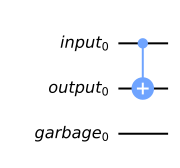

In [2]:
input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')

Uf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Uf.cx(input_bit[0], output_bit[0])

Uf.draw()

Para $V_f$, donde también necesitamos hacer una copia de la entrada para la basura, podemos usar las siguientes dos compuertas `cx`.

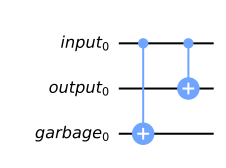

In [3]:
Vf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], output_bit[0])
Vf.draw()

Ahora podemos ver el efecto de aplicar primero $U_f$ y luego aplicar $V_f^{\dagger}$. El efecto neto es el siguiente circuito.

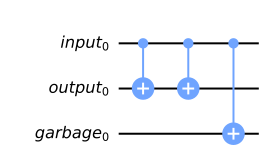

In [4]:
qc = Uf + Vf.inverse()
qc.draw()

Este circuito comienza con dos compuertas `cx` idénticas, cuyos efectos se anulan entre sí. Todo lo que queda es el `cx` final entre los registros de entrada y basura. Matemáticamente, esto significa

$$ V_f^\dagger U_f \left| x,0,0 \right\rangle = V_f^\dagger \left| x,f(x),0 \right\rangle = \left| x , 0 ,g(x) \right\rangle. $$

Aquí vemos que la acción de $V_f^\dagger$ no nos devuelve simplemente al estado inicial, sino que deja el primer qubit entrelazado con basura no deseada. Por lo tanto, cualquier paso posterior en un algoritmo no se ejecutará como se esperaba, ya que el estado no es el que necesitamos.

Por esta razón, necesitamos una forma de eliminar la basura clásica de nuestros algoritmos cuánticos. Esto se puede hacer mediante un método conocido como 'uncomputation'. Simplemente, necesitamos tomar otra variable vacía y aplicar $V_f$

$$ \left| x, 0, 0, 0 \right\rangle \rightarrow \left| x,f(x),g(x),0 \right\rangle. $$

Luego, aplicamos un conjunto de compuertas NOT controladas, cada una controlada en uno de los qubits utilizados para codificar la salida, y dirigida al qubit correspondiente en la variable vacía adicional.

Aquí está el circuito para hacer esto para nuestro ejemplo usando registros de un solo qubit.

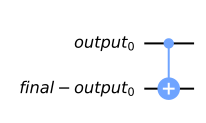

In [5]:
final_output_bit = QuantumRegister(1, 'final-output')

copy = QuantumCircuit(output_bit, final_output_bit)
copy.cx(output_bit, final_output_bit)

copy.draw()

El efecto de esto es copiar la información (si has escuchado hablar del teorema de no clonación, ten en cuenta que este no es el mismo proceso). Específicamente, transforma el estado de la siguiente manera.

$$ \left| x,f(x),g(x),0 \right\rangle \rightarrow \left| x,f(x),g(x),f(x) \right\rangle. $$

Finalmente, aplicamos $V_f^\dagger$, que deshace el cálculo original.

$$ \left| x,f(x),g(x),0 \right\rangle \rightarrow \left| x,0,0,f(x) \right\rangle. $$

No obstante, la salida copiada permanece. El efecto neto es realizar el cálculo sin basura y, por lo tanto, logra nuestro $U_f$ deseado.

Para nuestro ejemplo que utiliza registros de un solo qubit, y para los cuales $f(x) = x$, todo el proceso corresponde al siguiente circuito.

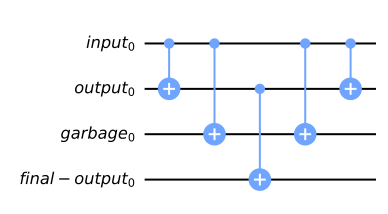

In [6]:
(Vf.inverse() + copy + Vf).draw()

Usando lo que sabes hasta ahora sobre cómo funcionan las compuertas `cx`, deberías poder ver que las dos aplicadas al registro de basura se cancelarán entre sí. Por lo tanto, hemos eliminado con éxito la basura.

### Ejercicios Rápidos

1. Demuestra que la salida se escribe correctamente en el registro de 'salida final' (y solo en este registro) cuando el registro de 'salida' se inicializa como $|0\rangle$.
2. Determina qué sucede cuando el registro de 'salida' se inicializa como $|1\rangle$.

Con este método y todos los demás cubiertos en este capítulo, ahora tenemos todas las herramientas que necesitamos para crear algoritmos cuánticos. Ahora podemos pasar a ver esos algoritmos en acción.

In [7]:
import qiskit.tools.jupyter
%qiskit_version_table